In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("fashion-mnist_test.csv",
    sep=",")

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X = df.iloc[:, 1:]
y = df.iloc[:, :1]

print(X[:10])
print(y[:10])

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       9       8   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0      14      53      99   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0      44     105      44      10   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       1       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...       103        87        56         0         0        

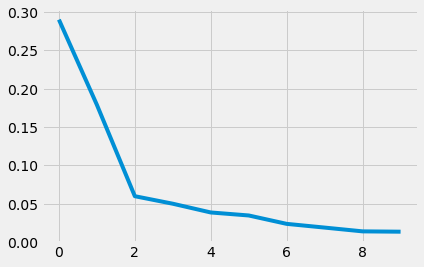

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X).transform(X)

plt.plot(range(pca.n_components), pca.explained_variance_ratio_)

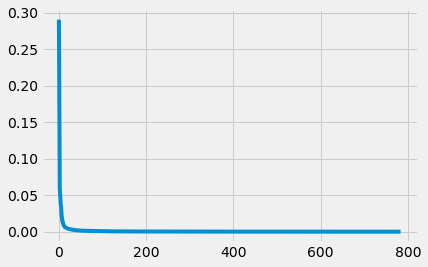

In [64]:
pca = PCA(n_components=784)
pca.fit(X).transform(X)

plt.plot(range(pca.n_components), pca.explained_variance_ratio_)

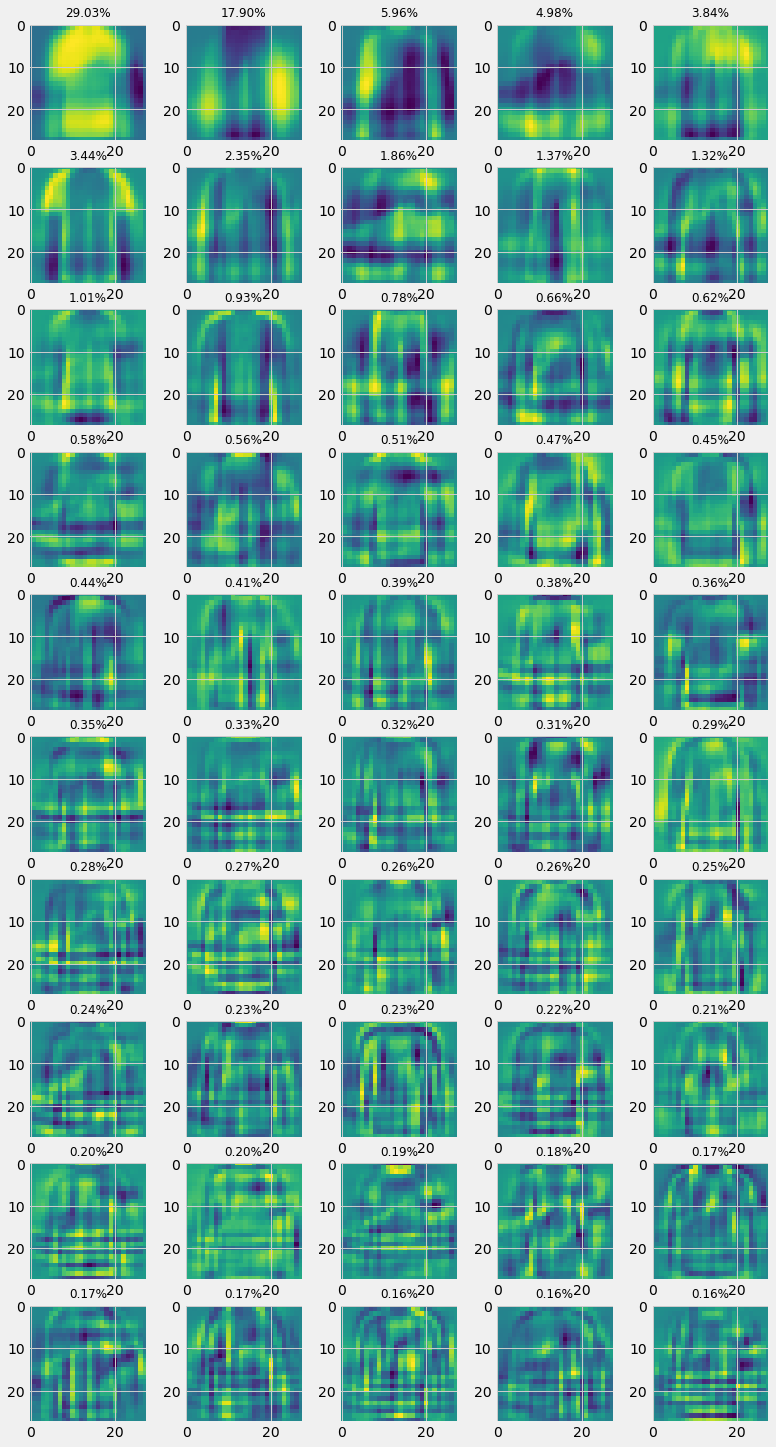

In [65]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 24))

for i in range(50):
    plt.subplot(10, 5, i+1)
    plt.title("{0:.2f}%".format(pca.explained_variance_ratio_[i]*100),
        fontsize=12)
    plt.imshow(pca.components_[i, :].reshape(28, 28))


Text(0.5, 1.0, 'PCA 2')

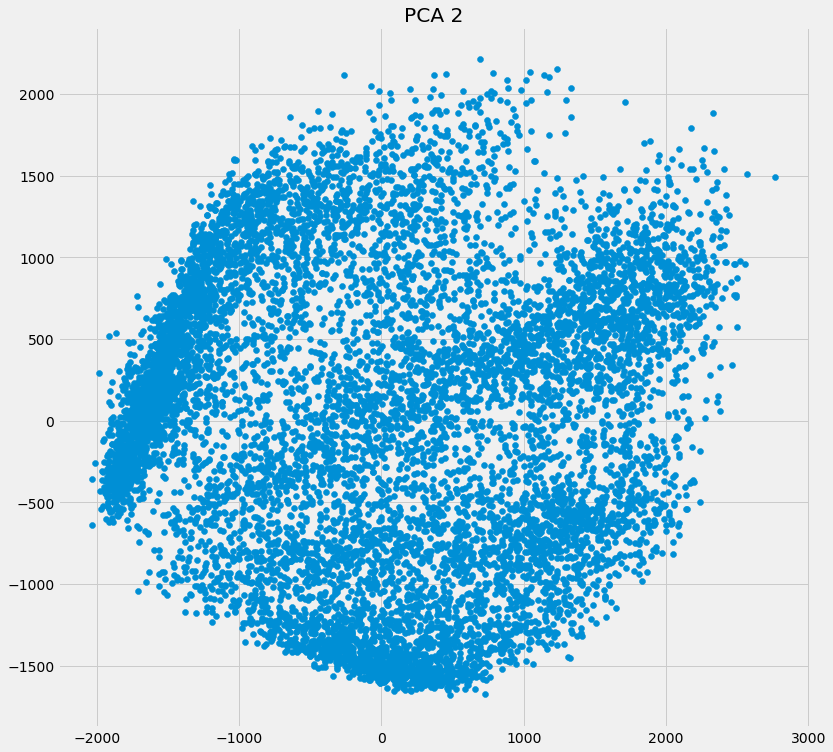

In [66]:
pca = PCA(n_components=2)
X_PCA2 = pca.fit(X).transform(X)

plt.figure(figsize=(12, 12))
plt.scatter(X_PCA2[:, 0], X_PCA2[:, 1])
plt.title("PCA 2")

Text(0.5, 1.0, 'inc PCA 2')

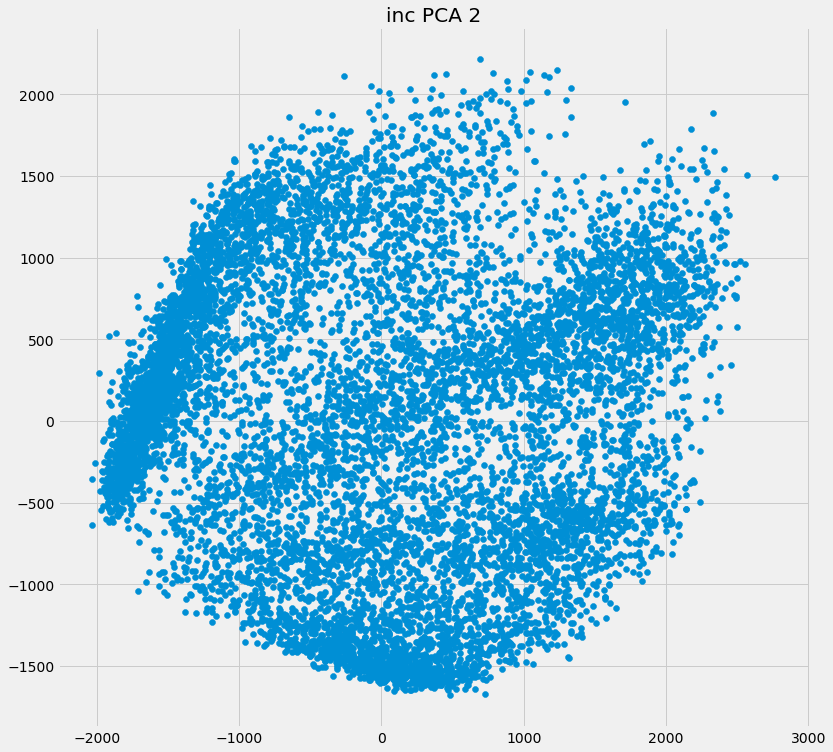

In [67]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_batches = 20
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_incPCA2 = inc_pca.transform(X)

plt.figure(figsize=(12, 12))
plt.scatter(X_incPCA2[:, 0], X_incPCA2[:, 1])
plt.title("inc PCA 2")

Text(0.5, 1.0, 'LLE 2')

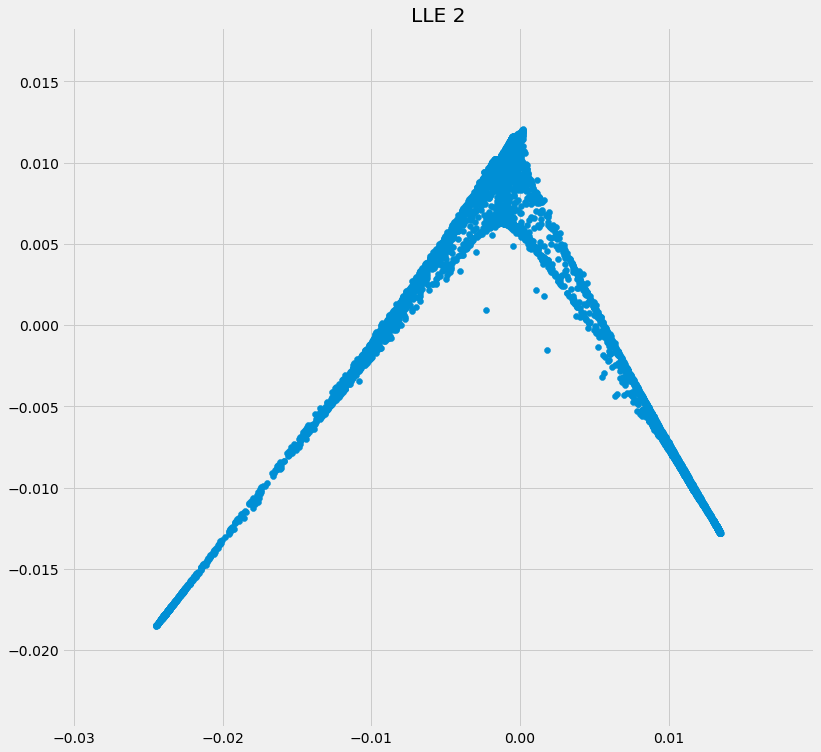

In [68]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_LLE2 = lle.fit_transform(X)

plt.figure(figsize=(12, 12))
plt.scatter(X_LLE2[:, 0], X_LLE2[:, 1])
plt.title("LLE 2")

0.4078025946062993
0.4492859647063953
0.43991093009003907
0.4192396378108435
0.4460346150362231
0.4355122086383768
0.4304778749668272
0.41777976503168274
0.4076882986115736


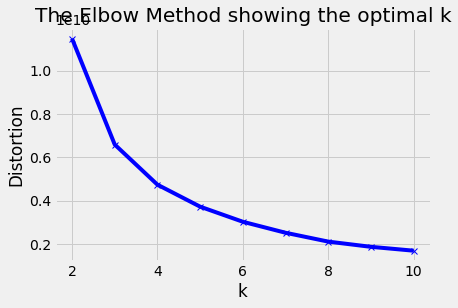

max_sil:  0.4492859647063953
best_k:  3


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
max_sil = -1
best_k = 0

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_PCA2)
    distortions.append(kmeans.inertia_)

    sil = silhouette_score(X_PCA2, kmeans.labels_)
    print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("max_sil: ", max_sil)
print("best_k: ", best_k)


In [72]:
from sklearn.cluster import MiniBatchKMeans

max_sil = -1
best_k = 0

K = range(2, 15)
for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
    minibatch_kmeans.fit(X_PCA2)
    sil = silhouette_score(X_PCA2, minibatch_kmeans.labels_)

    print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k

print("max_sil: ", max_sil)
print("best_k: ", best_k)

0.40974137996756155
0.44340543802690024
0.4387021229596219
0.41651244246759034
0.4037982199868914
0.42419456228802865
0.39561993285515057
0.4123141129829441
0.39342861884023517
0.37452172342865525
0.3760154517171304
0.3884416721262282
0.3545035237802081
max_sil:  0.44340543802690024
best_k:  3


Text(0.5, 1.0, 'KMEANS')

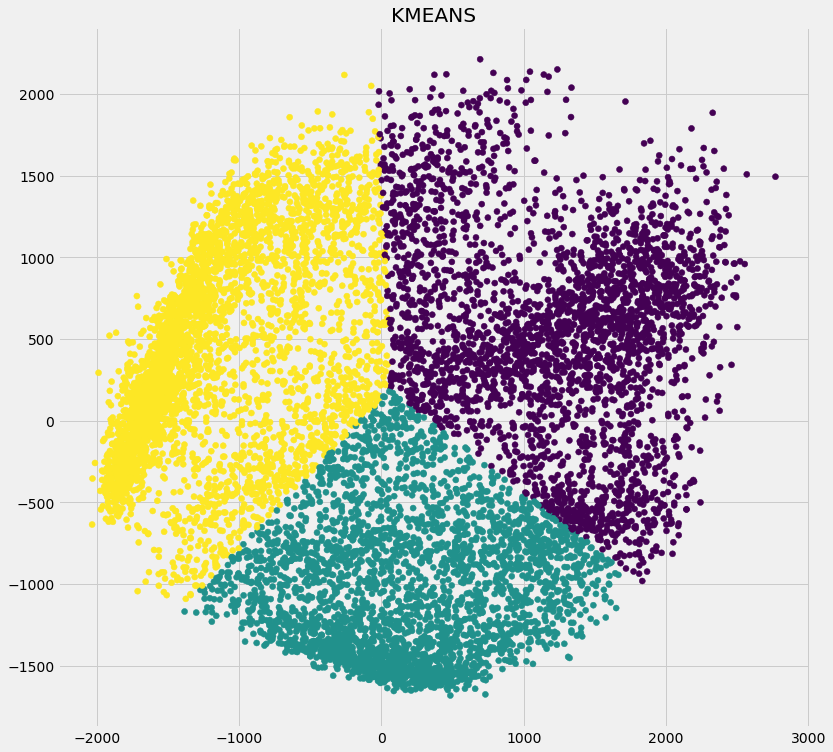

In [75]:
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X_PCA2)

plt.figure(figsize=(12, 12))
plt.scatter(X_PCA2[:, 0], X_PCA2[:, 1], c=y_pred)
plt.title("KMEANS")

Text(0.5, 1.0, 'DBSCAN')

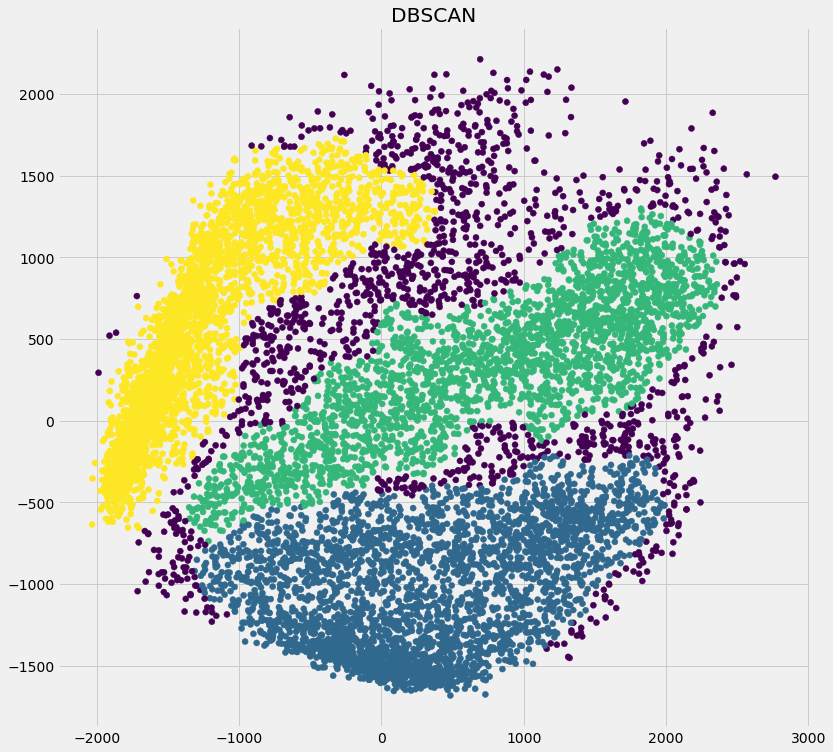

In [86]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=150, min_samples=50)
y_pred = dbscan.fit_predict(X_PCA2)


plt.figure(figsize=(12, 12))
plt.scatter(X_PCA2[:, 0], X_PCA2[:, 1], c=y_pred)
plt.title("DBSCAN")

In [87]:
pca = PCA(0.95)
X_PCA_095 = pca.fit(X).transform(X)
print(pca.n_components_)

max_sil = -1
best_k = 0

K = range(2, 15)
for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
    minibatch_kmeans.fit(X_PCA_095)
    sil = silhouette_score(X_PCA_095, minibatch_kmeans.labels_)

    print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k

print("max_sil: ", max_sil)
print("best_k: ", best_k)

182
0.2034847999633548
0.19525885440313076
0.19060371081218114
0.17185760792193575
0.18325137042507278
0.16032343850411424
0.15360080826117675
0.15776675494833384
0.11883960449410547
0.1353108442180492
0.1327458861629403
0.14822526106041414
0.13691435478045097
max_sil:  0.2034847999633548
best_k:  2


In [88]:
max_sil = -1
best_k = 0

K = range(2, 15)
for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
    minibatch_kmeans.fit(X)
    sil = silhouette_score(X, minibatch_kmeans.labels_)

    print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k

print("max_sil: ", max_sil)
print("best_k: ", best_k)

0.19297760507049236
0.18098145577389158
0.14560747251511102
0.15641887185284536
0.16812676698364276
0.1643895166951012
0.1502445233692518
0.13719191458651797
0.12282385357732518
0.1200816941586427
0.12027238230569903
0.12001099230593604
0.11903288296633041
max_sil:  0.19297760507049236
best_k:  2


In [89]:
lle = LocallyLinearEmbedding(n_components=10, n_neighbors=10)
X_reduced = lle.fit_transform(X)

max_sil = -1
best_k = 0

K = range(2, 15)
for k in K:
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k)
    minibatch_kmeans.fit(X_reduced)
    sil = silhouette_score(X_reduced, minibatch_kmeans.labels_)

    print(sil)
    if sil > max_sil:
        max_sil = sil
        best_k = k

print("max_sil: ", max_sil)
print("best_k: ", best_k)

0.21861275969521765
0.18548357319288689
0.29295715992504745
0.2581180535004352
0.3021053850515459
0.3926880220591709
0.4142081154713654
0.4753479611794216
0.5318372642966551
0.5812460039820097
0.5578047426175623
0.5618272148848451
0.5340918887253329
max_sil:  0.5812460039820097
best_k:  11


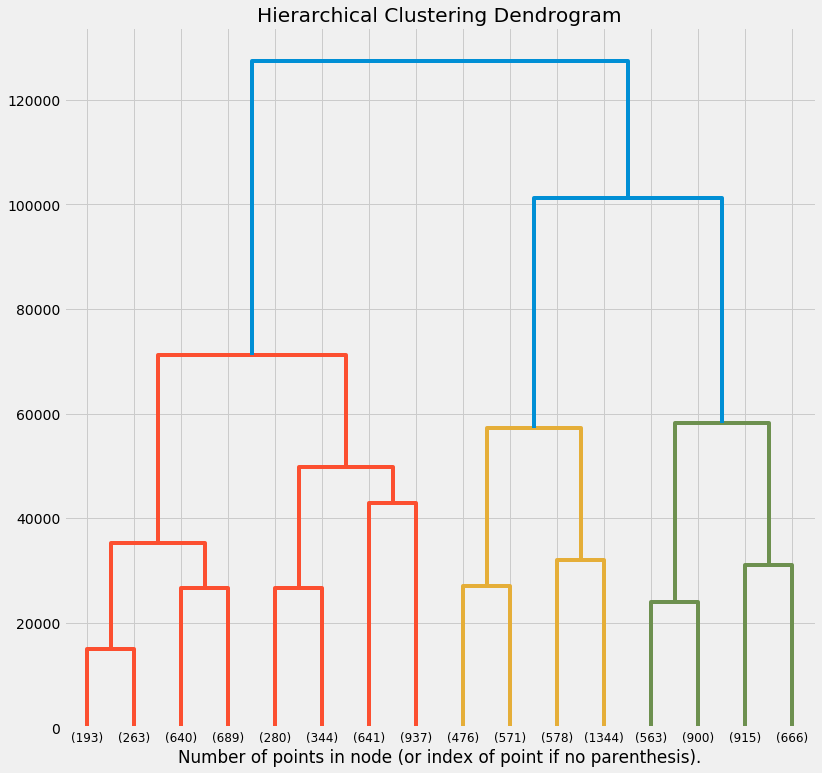

In [95]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12, 12))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()